## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [3]:
df.describe()

,user_id,converted
count,294478.000000,294478.000000
mean,787974.124733,0.119659
std,91210.823776,0.324563
min,630000.000000,0.000000
25%,709032.250000,0.000000
50%,787933.500000,0.000000
75%,866911.750000,0.000000
max,945999.000000,1.000000


b. Use the cell below to find the number of rows in the dataset.

In [4]:
df.shape[0]

294478

c. The number of unique users in the dataset.

In [5]:
df['user_id'].nunique()

290584

d. The proportion of users converted.

In [6]:
df[df['converted']==1].shape[0]/df.shape[0]

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't match.

In [7]:
df[(df['landing_page'] != 'new_page') & (df['group'] != 'treatment')].shape[0]

145274

f. Do any of the rows have missing values?

In [8]:
print(df.isna().sum())
print(" ")
print(df.isnull().sum())

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64
 
user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64


`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [9]:
df2 = df[((df['landing_page'] == 'new_page') & (df['group'] == 'treatment')) | 
         ((df['landing_page'] == 'old_page') & (df['group'] == 'control'))]
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [10]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [11]:
df2['user_id'].nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [12]:
dup_id = df2[df2['user_id'].duplicated()]['user_id']
dup_id.values[0]

773192

c. What is the row information for the repeat **user_id**? 

In [13]:
df2[df2['user_id']==dup_id.values[0]]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [14]:
indx = df2[df2['user_id']==dup_id.values[0]].index[0]
df2.drop(indx, axis=0, inplace=True)
print(df2['user_id'].shape[0])
df2[df2['user_id']==dup_id.values[0]]

290584


/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [15]:
df2[df2['converted']==1].shape[0] / df2.shape[0]

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [16]:
df2[(df2['converted']==1) & (df2['group']=='control')].shape[0]/df2[df2['group']=='control'].shape[0]

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [17]:
df2[(df2['converted']==1) & (df2['group']=='treatment')].shape[0]/df2[df2['group']=='treatment'].shape[0]

0.11880806551510564

d. What is the probability that an individual received the new page?

In [18]:
df2[df2['landing_page']=='new_page'].shape[0] / df2.shape[0]

0.5000619442226688

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

**There is no sufficient evidences to conclude that the new treatment page leads to more conversions.**

Converted rate of control is 0.120 and converted rate of treatment is 0.119. Also the probability that an individual received the new page is 0.5.
These shows that people recieved new page and people recieved old page were almost same and converted rates of them were almost same.

So there is no sufficient evidences to conclude that the new treatment page leads to more conversions.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Null : $p_{new} - p_{old}≦0$**

**Alternative : $p_{new} - p_{old}>0$**

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [19]:
p_new = df2[df2['converted']==1].shape[0] / df2['converted'].shape[0]
p_new

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [20]:
p_old = df2[df2['converted']==1].shape[0] / df2['converted'].shape[0]
p_old

0.11959708724499628

c. What is $n_{new}$, the number of individuals in the treatment group?

In [21]:
n_new = df2[df2['group']=='treatment'].shape[0]
n_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [22]:
n_old = df2[df2['group']=='control'].shape[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [23]:
new_page_converted = np.random.choice([1,0], size=n_new, p=[p_new, 1-p_new])
new_page_converted

array([0, 0, 1, ..., 0, 0, 0])

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [24]:
old_page_converted = np.random.choice([1,0], size=n_old, p=[p_old, 1-p_old])
old_page_converted

array([0, 0, 0, ..., 0, 0, 0])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [25]:
p_new_sim = sum(new_page_converted) / n_new
p_old_sim = sum(old_page_converted) / n_old
p_new_sim - p_old_sim

-1.5843283947061804e-05

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [26]:
N = 10000
p_diffs = np.zeros(N)

In [27]:
import time
t_start = time.time() 
for i in range(0,N):
    new_page_converted = np.random.choice([1,0], size=n_new, p=[p_new, 1-p_new])
    old_page_converted = np.random.choice([1,0], size=n_old, p=[p_old, 1-p_old])
    p_new_sim = sum(new_page_converted) / n_new
    p_old_sim = sum(old_page_converted) / n_old
    p_diffs[i] = p_new_sim - p_old_sim
    if(i>0):
        if (i%100==0):
            print("■",end="")
            if (i%1000==0):
                print(" | ", i)

t_end = time.time() 
print("■ | ", i+1)
print("Finished.")
print("Time to finish ： ", t_end - t_start)

■■■■■■■■■■ |  1000
■■■■■■■■■■ |  2000
■■■■■■■■■■ |  3000
■■■■■■■■■■ |  4000
■■■■■■■■■■ |  5000
■■■■■■■■■■ |  6000
■■■■■■■■■■ |  7000
■■■■■■■■■■ |  8000
■■■■■■■■■■ |  9000
■■■■■■■■■■ |  10000
Finished.
Time to finish ：  323.47921800613403


i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

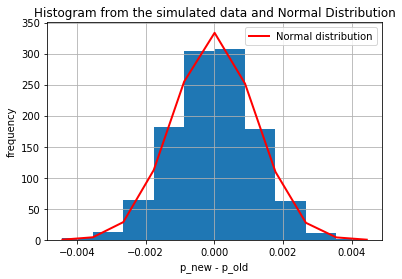

In [28]:
mu = p_diffs.mean()
sigma = p_diffs.std()

count, bins, ignored = plt.hist(p_diffs, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
         np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r', label="Normal distribution")
plt.title('Histogram from the simulated data and Normal Distribution')
plt.xlabel('p_new - p_old')
plt.ylabel('frequency')
plt.legend()
plt.grid();

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

0.90720000000000001

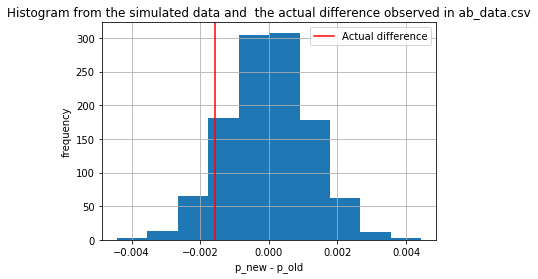

In [29]:
p_new_from_data = df2[(df2['landing_page'] == 'new_page') & (df2['converted']==1)].shape[0] / df2[(df2['landing_page'] == 'new_page')].shape[0]
p_old_from_data = df2[(df2['landing_page'] == 'old_page') & (df2['converted']==1)].shape[0] / df2[(df2['landing_page'] == 'old_page')].shape[0]
p_diffs_from_data = p_new_from_data - p_old_from_data

plt.hist(p_diffs, density=True)
plt.axvline(x=p_diffs_from_data, color='r', label="Actual difference")
plt.title('Histogram from the simulated data and  the actual difference observed in ab_data.csv')
plt.xlabel('p_new - p_old')
plt.ylabel('frequency')
plt.legend()
plt.grid();

# p-value
sum( p_diffs > p_diffs_from_data ) / p_diffs.shape[0]

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**This is called "p-value" in scientific studies, which was calculated in j. A small p-value (< 0.05) would suggest to reject the null-hypothesis, but we failed to reject the null-hypothesis as our p_value is way higher (0.9).**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [30]:
import statsmodels.api as sm

convert_old = df2[(df2['converted']==1) & (df2['landing_page']=='old_page')].shape[0]
convert_new = df2[(df2['converted']==1) & (df2['landing_page']=='new_page')].shape[0]
n_old = df2[df2['landing_page']=='old_page'].shape[0]
n_new = df2[df2['landing_page']=='new_page'].shape[0]

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [31]:
z_score, p_value = sm.stats.proportions_ztest([convert_new, convert_old], [n_new, n_old],  alternative='larger') 
# Since the alternative is "P_new > P_old", params of alternative is 'larger'.
z_score, p_value

(-1.3109241984234394, 0.90505831275902449)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**The calculated p-value using "stats.proportions_ztest" is almost the same value as we calculated at question j. So, we can conclude based on the test results that there is no improvement in terms of the conversion rate by the new page.**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**We should be performing Logistic Regression.**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [32]:
df2['intercept']=1
df2[['control', 'ab_page']] = pd.get_dummies(df2['group'])
df2.drop(['control'], axis=1, inplace=True)
df2.head()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]
/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#i

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [33]:
logistic_model = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [34]:
res = logistic_model.fit()
res.summary()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Tue, 31 Dec 2019   Pseudo R-squ.:               8.077e-06
Time:                        04:16:19   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

**The null hypothesis in our logistic regression model argues that there is no relationship among the dependent and independent variables. In this case, The null is that the conversion is not related to the page that was shown to the user. The alternative would suggest that there is a relation between the page showed to the user and the conversion. So that the new page would lead to higher conversions.
Since the p-value (0.19)in the logistic regression did not fall as well under the level of 0.05, we can argue that there is no relationship among the conversion of a user and the page that was shown to the user.**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Generally, when the number of explanatory variables increases, the accuracy of the model increases too and we can see a causality clearly. But if a model has too many explanatory variables, the causality becomes complicated and difficult to summarize.**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [35]:
df_country = pd.read_csv('countries.csv')
df_country.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [36]:
df_country['country'].unique()

array(['UK', 'US', 'CA'], dtype=object)

In [37]:
df_country['country'].value_counts()

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

In [38]:
df_with_country = df_country.set_index('user_id').join(df2.set_index('user_id'), how='inner')

In [39]:
df_with_country[['CA', 'UK', 'US']] = pd.get_dummies(df_with_country['country'])
df_with_country.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,CA,UK,US
user_id,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0


In [40]:
logistic_model_with_country = sm.Logit(df_with_country['converted'], df_with_country[['intercept', 'ab_page', 'US', 'UK']])
res2 = logistic_model_with_country.fit()
res2.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Tue, 31 Dec 2019   Pseudo R-squ.:               2.323e-05
Time:                        04:16:20   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0300      0.027    -76.249      0.000      -2.082      -1.978
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
US             0.0408      0.027      1.516      0.130      -0.012       0.093
UK             0.0506      0.028      1.784      0.074      -0.005       0.106
==============================================================================
"""

**Since the p-values in the logistic regression did not fall as well under the level of 0.05, we can argue that there is no relationship among the conversion of a user and the country of the user. But the p-value of "UK" is 0.074. It shows people in UK tended to convert.**

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [41]:
df_with_country['ab_page_at_CA'] = df_with_country['CA']*df_with_country['ab_page']
df_with_country['ab_page_at_US'] = df_with_country['US']*df_with_country['ab_page']
df_with_country['ab_page_at_UK'] = df_with_country['UK']*df_with_country['ab_page']
df_with_country.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,CA,UK,US,ab_page_at_CA,ab_page_at_US,ab_page_at_UK
user_id,,,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1,0,0,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1,0,1,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0,0,0,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,1,0,0,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0,0,0,1


In [42]:
logistic_model_with_interractions = sm.Logit(df_with_country['converted'], df_with_country[['intercept', 'ab_page', 'UK', 'US', 'ab_page_at_UK', 'ab_page_at_US']])
res3 = logistic_model_with_interractions.fit()
res3.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Tue, 31 Dec 2019   Pseudo R-squ.:               3.482e-05
Time:                        04:16:21   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1920
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
intercept        -2.0040      0.036    -55.008      0.000      -2.075      -1.933
ab_page          -0.0674      0.052     -1.297      0.195      -0.169       0.034
UK                0.0118      0.040      0.296      0.767      -0.066       0.090
US                0.0175      0.038      0.465      0.642      -0.056       0.091
ab_page_at_UK     0.0783      0.057      1.378      0.168      -0.033       0.190
ab_page_at_US     0.0469      0.054      0.872      0.383      -0.059       0.152
=================================================================================
"""

**Since each p-values in the logistic regression did not fall as well under the level of 0.05, we can argue that there is no relationship among the conversion of a user and the country of the user individually neither interactually.**

### Influence of time

In [43]:
print(df2['timestamp'].min())
print(df2['timestamp'].max())

2017-01-02 13:42:05.378582
2017-01-24 13:41:54.460509


In [44]:
df2['timestamp2'] = pd.to_datetime(df2['timestamp'])
df2.head()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,user_id,timestamp,group,landing_page,converted,intercept,ab_page,timestamp2
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,2017-01-21 22:11:48.556739
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,2017-01-12 08:01:45.159739
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,2017-01-11 16:55:06.154213
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,2017-01-08 18:28:03.143765
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,2017-01-21 01:52:26.210827


In [45]:
df2['weekday'] = 1
df2.loc[df2['timestamp2'].dt.dayofweek == 5, 'weekday'] = 0
df2.loc[df2['timestamp2'].dt.dayofweek == 6, 'weekday'] = 0

df2['hour'] = df2['timestamp2'].dt.hour
df2.head()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,timestamp2,weekday,hour
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,2017-01-21 22:11:48.556739,0,22
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,2017-01-12 08:01:45.159739,1,8
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,2017-01-11 16:55:06.154213,1,16
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,2017-01-08 18:28:03.143765,0,18
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,2017-01-21 01:52:26.210827,0,1


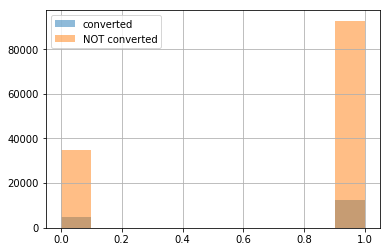

In [46]:
df2[(df2['group']=='control') & (df2['converted']==1)]['weekday'].hist(alpha=0.5, label='converted')
df2[(df2['group']=='control') & (df2['converted']==0)]['weekday'].hist(alpha=0.5, label='NOT converted')
plt.legend()

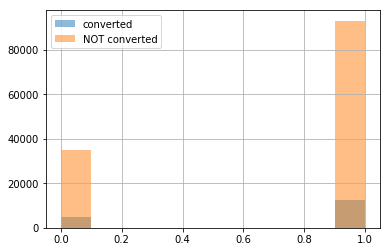

In [47]:
df2[(df2['group']=='treatment') & (df2['converted']==1)]['weekday'].hist(alpha=0.5, label='converted')
df2[(df2['group']=='treatment') & (df2['converted']==0)]['weekday'].hist(alpha=0.5, label='NOT converted')
plt.legend()

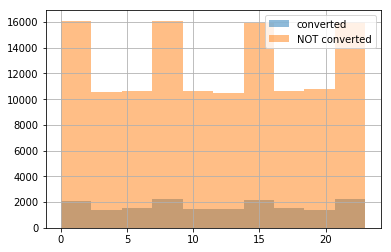

In [48]:
df2[(df2['group']=='control') & (df2['converted']==1)]['hour'].hist(alpha=0.5, label='converted')
df2[(df2['group']=='control') & (df2['converted']==0)]['hour'].hist(alpha=0.5, label='NOT converted')
plt.legend()

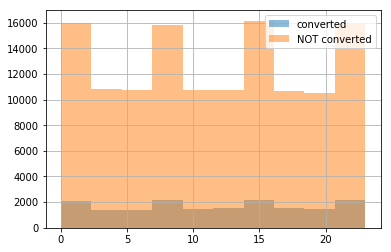

In [49]:
df2[(df2['group']=='treatment') & (df2['converted']==1)]['hour'].hist(alpha=0.5, label='converted')
df2[(df2['group']=='treatment') & (df2['converted']==0)]['hour'].hist(alpha=0.5, label='NOT converted')
plt.legend()

In [50]:
logistic_model_time = sm.Logit(df2['converted'], df2[['intercept', 'ab_page', 'weekday', 'hour']])
res4 = logistic_model_time.fit()
res4.summary()

Optimization terminated successfully.
         Current function value: 0.366106
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Tue, 31 Dec 2019   Pseudo R-squ.:               4.157e-05
Time:                        04:16:23   Log-Likelihood:            -1.0638e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                   0.03142
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0139      0.016   -128.980      0.000      -2.045      -1.983
ab_page       -0.0150      0.011     -1.309      0.190      -0.037       0.007
weekday       -0.0005      0.013     -0.038      0.970      -0.026       0.025
hour           0.0022      0.001      2.669      0.008       0.001       0.004
==============================================================================
"""

**Since the p-value of hour in the logistic regression did fall as well under the level of 0.05, we can argue that there is a relationship among the conversion of a user and the hour of the user landed the page.**

<a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!

## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [51]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0